<b>Name   : Shinde Saurabh Ashok <br>
  Course : BUDT704<br>
  Section: 0503<br>
  Date   : 3 Nov 2023<br></b>

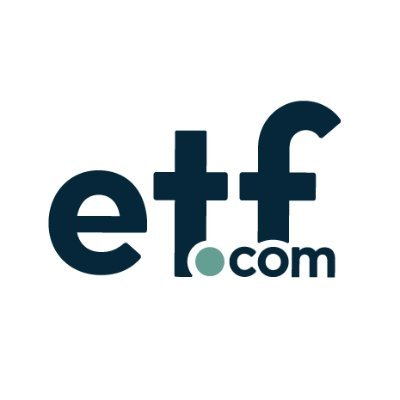

<div style="text-align:center">
    <b> <h1>Exploring Socially Responsible Investment Opportunities</h1></b>
</div style="text-align:center">

This Jupyter Notebook is dedicated to investigating socially responsible investment opportunities. In this project, we work at a financial services organization where the goal is to create an investment fund that adheres to social responsibility standards. As a data analyst, I've been tasked with conducting research and making recommendations for this project.

To get started, I've found a useful resource: ETF.com's collection of socially responsible exchange traded funds (ETFs). This website contains a wealth of potential investment possibilities that prioritize social and environmental concerns.



I started by scraping the pertinent data and putting it into an Excel worksheet to facilitate meaningful discussions with the executives. With this significant dataset in hand, our next step is to do a thorough data analysis. Please visit the website for more information and context about the potential investing alternatives.

Let us begin our path toward meaningful and socially responsible investments!

In [192]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
import regex as re

#Using this method to avoid warning so it will not look bad in worksheet.
warnings.filterwarnings("ignore", category=FutureWarning)

In [193]:
#Read the excel and handle missing values
df=pd.read_excel('HW5_Socially Responsible ETFs.xlsx',na_values=['--']) 
df.head(20)


,Ticker,Fund Name,Issuer,AUM,Expense Ratio,3-Mo TR,Segment
0,ESGU,iShares ESG Aware MSCI USA ETF,Blackrock,$23.43B,0.0015,0.0348,Equity: U.S. - Total Market
1,ESGD,iShares ESG Aware MSCI EAFE ETF,Blackrock,$7.11B,0.0020,0.0165,Equity: Developed Markets Ex-North America - T...
2,ESGE,iShares ESG Aware MSCI EM ETF,Blackrock,$7.00B,0.0025,0.0147,Equity: Emerging Markets - Total Market
3,ICLN,iShares Global Clean Energy ETF,Blackrock,$6.46B,0.0042,0.0612,Equity: Global Renewable Energy
4,ESGV,Vanguard ESG U.S. Stock ETF,Vanguard,$5.72B,0.0012,0.0355,Equity: U.S. - Total Market
5,XSOE,WisdomTree Emerging Markets ex-State-Owned Ent...,WisdomTree,$4.28B,0.0032,-0.0013,Equity: Emerging Markets - Total Market
6,SUSL,iShares ESG MSCI USA Leaders ETF,Blackrock,$4.18B,0.0010,0.0527,Equity: U.S. - Total Market
7,SUSA,iShares MSCI USA ESG Select ETF,Blackrock,$4.06B,0.0025,0.0439,Equity: U.S. - Total Market
8,USSG,Xtrackers MSCI U.S.A. ESG Leaders Equity ETF,Deutsche Bank,$4.00B,0.0010,0.0498,Equity: U.S. - Total Market
9,DSI,iShares MSCI KLD 400 Social ETF,Blackrock,$3.75B,0.0025,0.0540,Equity: U.S. - Total Market


<b>Standardization of Data Units</b>

To address conflicts, we are standardizing units in our dataset. Identifying discrepancies, defining a common unit, and transforming data points for proper analysis and comparisons are all part of this procedure.We are converting values into Millions So it will be easy in further calculations.



In [194]:
#Create pattern to match inclusing M,B and $.
M_type=r'[$M]'
B_type=r'[$B]'

#replace $, M and B with blank and convert the according to Millions ad Billions.
df['AUM'] = df['AUM'].astype(str).apply(lambda data: float(re.sub(M_type,'',data)) * 1e6 if 'M' in data else (float(re.sub(B_type,'',data)) * 1e9 if 'B' in data else float(data)))
#df['AUM']=df['AUM'].apply(lambda data: format(data,".2f"))
df['AUM'].astype('float')
df['AUM']=df['AUM']/1000000
df

,Ticker,Fund Name,Issuer,AUM,Expense Ratio,3-Mo TR,Segment
0,ESGU,iShares ESG Aware MSCI USA ETF,Blackrock,23430.0,0.0015,0.0348,Equity: U.S. - Total Market
1,ESGD,iShares ESG Aware MSCI EAFE ETF,Blackrock,7110.0,0.0020,0.0165,Equity: Developed Markets Ex-North America - T...
2,ESGE,iShares ESG Aware MSCI EM ETF,Blackrock,7000.0,0.0025,0.0147,Equity: Emerging Markets - Total Market
3,ICLN,iShares Global Clean Energy ETF,Blackrock,6460.0,0.0042,0.0612,Equity: Global Renewable Energy
4,ESGV,Vanguard ESG U.S. Stock ETF,Vanguard,5720.0,0.0012,0.0355,Equity: U.S. - Total Market
...,...,...,...,...,...,...,...
161,EEMX,SPDR MSCI Emerging Markets Fossil Fuel Reserve...,State Street Global Advisors,NaN,0.0030,0.0108,Equity: Emerging Markets - Total Market
162,EFAX,SPDR MSCI EAFE Fossil Fuel Reserves Free ETF,State Street Global Advisors,NaN,0.0020,0.0110,Equity: Developed Markets Ex-North America - T...
163,SHE,SPDR SSGA Gender Diversity Index ETF,State Street Global Advisors,NaN,0.0020,0.0290,Equity: U.S. - Large Cap
164,SPYX,SPDR S&P 500 Fossil Fuel Reserves Free ETF,State Street Global Advisors,NaN,0.0020,0.0337,Equity: U.S. - Large Cap


<b>Data Processing: Variable Segment</b>

To isolate information like asset class (e.g., equities, fixed income), market (e.g., U.S., global), and specific segment (e.g., Total Market, Mid Cap Growth), we need to break the 'Segment' variable into three independent columns - 'Asset Class', 'Market', and 'Segment'. This is accomplished by extracting and updating the dataframe with the necessary information.

In [195]:
#Set delimiter to split
delimit=r':(.*?)(?: -|$)'
#split the data into required columns
split=df['Segment'].str.split(delimit,n=1,expand=True)
#assign new columns
df[['AssetClass','Market','MarketSegment']]=split
#drop old column,
df.drop(columns=['Segment'],inplace=True)
df

,Ticker,Fund Name,Issuer,AUM,Expense Ratio,3-Mo TR,AssetClass,Market,MarketSegment
0,ESGU,iShares ESG Aware MSCI USA ETF,Blackrock,23430.0,0.0015,0.0348,Equity,U.S.,Total Market
1,ESGD,iShares ESG Aware MSCI EAFE ETF,Blackrock,7110.0,0.0020,0.0165,Equity,Developed Markets Ex-North America,Total Market
2,ESGE,iShares ESG Aware MSCI EM ETF,Blackrock,7000.0,0.0025,0.0147,Equity,Emerging Markets,Total Market
3,ICLN,iShares Global Clean Energy ETF,Blackrock,6460.0,0.0042,0.0612,Equity,Global Renewable Energy,
4,ESGV,Vanguard ESG U.S. Stock ETF,Vanguard,5720.0,0.0012,0.0355,Equity,U.S.,Total Market
...,...,...,...,...,...,...,...,...,...
161,EEMX,SPDR MSCI Emerging Markets Fossil Fuel Reserve...,State Street Global Advisors,NaN,0.0030,0.0108,Equity,Emerging Markets,Total Market
162,EFAX,SPDR MSCI EAFE Fossil Fuel Reserves Free ETF,State Street Global Advisors,NaN,0.0020,0.0110,Equity,Developed Markets Ex-North America,Total Market
163,SHE,SPDR SSGA Gender Diversity Index ETF,State Street Global Advisors,NaN,0.0020,0.0290,Equity,U.S.,Large Cap
164,SPYX,SPDR S&P 500 Fossil Fuel Reserves Free ETF,State Street Global Advisors,NaN,0.0020,0.0337,Equity,U.S.,Large Cap


<b> Data Frame Modification: Indexing and Sorting at Multiple Levels</b>

The data frame will be altered to include a multi-level index, first by issuer, then by ticker. The dataframe will be sorted and the first fifty records will be shown for evaluation.

In [196]:
#set multiindex and display 50 records
df.set_index(['Issuer','Ticker']).sort_values(by=['Issuer','Ticker']).head(50)


Fund Name  \
Issuer                       Ticker                                                      
Allianz                      EMNT         PIMCO Enhanced Short Maturity Active ESG ETF   
                             RAFE                              PIMCO RAFI ESG U.S. ETF   
Ameriprise Financial         ESGN    Columbia Sustainable International Equity Inco...   
                             ESGS          Columbia Sustainable U.S. Equity Income ETF   
Barclays                     GRN                             iPath Series B Carbon ETN   
                             RODI                    Barclays Return on Disability ETN   
                             WIL                      Barclays Women in Leadership ETN   
Beyond Investing             VEGN                               U.S. Vegan Climate ETF   
Blackrock                    BGRN                        iShares Global Green Bond ETF   
                             CRBN              iShares MSCI ACWI Low Carbon Target ETF   
                             DMXF                   iShares ESG Advanced MSCI EAFE ETF   
                             DSI                       iShares MSCI KLD 400 Social ETF   
                             EAGG            iShares ESG Aware U.S. Aggregate Bond ETF   
                             EAOA          iShares ESG Aware Aggressive Allocation ETF   
                             EAOK        iShares ESG Aware Conservative Allocation ETF   
                             EAOM            iShares ESG Aware Moderate Allocation ETF   
                             EAOR              iShares ESG Aware Growth Allocation ETF   
                             EMXF                     iShares ESG Advanced MSCI EM ETF   
                             ESGD                      iShares ESG Aware MSCI EAFE ETF   
                             ESGE                        iShares ESG Aware MSCI EM ETF   
                             ESGU                       iShares ESG Aware MSCI USA ETF   
                             ESML             iShares ESG Aware MSCI USA Small-Cap ETF   
                             EUSB       iShares ESG Advanced Total USD Bond Market ETF   
                             HYXF    iShares ESG Advanced High Yield Corporate Bond...   
                             ICLN                      iShares Global Clean Energy ETF   
                             LDEM                      iShares ESG MSCI EM Leaders ETF   
                             SDG                        iShares MSCI Global Impact ETF   
                             SUSA                      iShares MSCI USA ESG Select ETF   
                             SUSB    iShares ESG Aware 1-5 Year USD Corporate Bond ETF   
                             SUSC             iShares ESG Aware USD Corporate Bond ETF   
                             SUSL                     iShares ESG MSCI USA Leaders ETF   
                             USXF                    iShares ESG Advanced MSCI USA ETF   
                             XJH                  iShares ESG Screened S&P Mid-Cap ETF   
                             XJR                iShares ESG Screened S&P Small-Cap ETF   
                             XVV                      iShares ESG Screened S&P 500 ETF   
CICC                         KCCA          KraneShares California Carbon Allowance ETF   
                             KESG         KraneShares MSCI China ESG Leaders Index ETF   
                             KEUA            KraneShares European Carbon Allowance ETF   
                             KGRN    KraneShares MSCI China Clean Technology Index ETF   
                             KRBN                        KraneShares Global Carbon ETF   
Change Finance               CHGX    Change Finance U.S. Large Cap Fossil Fuel Free...   
Compagnie Lombard Odier SCmA ESUS        ETRACS 2x Leveraged MSCI USA ESG Focus TR ETN   
Crestview                    MDCP                    VictoryShares THB Mid Cap ESG ETF   
                           

<b>Observation</b>
<br>The major issues supported by the ETF's is mainly Environmental Sustainability like Decarbonization,Clean Water and, Clean Energy. </br>
<b>Grouping</b></br>
To group them together to provide categories of social issue we can use regex to search certain keywords such as carbon, sustain forEnvironmental Sustainability and for Social cause keywords like LGBT, Women etc.</br>

# Analysis

<b>1.</b>
Based on our investigation of socially responsible ETFs, we discovered that Blackrock and Nuveen Securities have the most socially responsible ETFs. 
Blackrock has a bigger presence in this market, having issued a large number of socially responsible ETFs. Nuveen Securities,
with a sizable number of offers, also shows promise.
We ca also consider Vanguard as it also shows promissing number of AUM.


In [197]:
#Count the value for funds for each issuer.
df['Issuer'].value_counts().head(5)


Blackrock                                   27
Nuveen Securities                           12
Deutsche Bank                               10
Invesco                                      9
Mirae Asset Global Investments Co., Ltd.     9
Name: Issuer, dtype: int64

<b>2.</b>
After evaluating each issuer's total assets under management, we notice that Blackrock and Vanguard have the largest total assets. Blackrock is a strong participant in the sector, managing a significant amount of assets and demonstrating their skill and market trust. Vanguard also has a sizable chunk of assets, demonstrating a considerable influence in the investment market.

In [198]:
#Evalute total assets under each issuer.
df.groupby('Issuer')['AUM'].sum().sort_values(ascending=False).head(5)

Issuer
Blackrock        65469.72
Vanguard          8783.04
Invesco           6268.55
WisdomTree        5465.83
Deutsche Bank     5417.78
Name: AUM, dtype: float64

<b>3.</b>
Based on an examination of assets under management (AUM) for each fund, it is clear that Blackrock stands out. This is especially remarkable given that Blackrock is responsible for the top four funds with the biggest AUM. This implies a large market presence as well as investor trust in their goods.

Given this observation, I strongly advise more research into Blackrock.

In [199]:
#Find top 5 issuer with its fund by AUM
df[['Issuer','Fund Name','AUM']].sort_values(by=['AUM'],ascending=False).head(5)

,Issuer,Fund Name,AUM
0,Blackrock,iShares ESG Aware MSCI USA ETF,23430.0
1,Blackrock,iShares ESG Aware MSCI EAFE ETF,7110.0
2,Blackrock,iShares ESG Aware MSCI EM ETF,7000.0
3,Blackrock,iShares Global Clean Energy ETF,6460.0
4,Vanguard,Vanguard ESG U.S. Stock ETF,5720.0


<b>4.</b>
Expense ratio study gives important insights into the cost-effectiveness of funds offered by various issuers. Humankind USA LLC, Vanguard, JPMorgan Chase, Deutsche Bank, and Blackrock all have significant advantages. Humankind USA LLC and Vanguard stand out for having reduced expense ratios, indicating a dedication to cost-cutting. With its competitive expenditure ratio, JPMorgan Chase gives an opportunity for further investigation. Deutsche Bank and Blackrock provides a diversified choice of funds with low expenses. Investigating these issuers yields useful insights for improving investment decisions and comprehending cost-cutting methods in the world of fund offerings.

In [200]:
#find the mean of expence ratio by issuer.
df.groupby('Issuer')['Expense Ratio'].agg(['count','mean']).sort_values(by=['mean','count']).head(5)

,count,mean
Issuer,,
Humankind USA LLC,1,0.001100
Vanguard,3,0.001367
JPMorgan Chase,1,0.001500
Deutsche Bank,10,0.001690
Blackrock,27,0.001900


<b>5.</b>
Based on the frequency distributions of asset classes, markets, and segments for each issuer's funds, it is clear that the most common combination across all issuers is an Equity fund with a U.S. market focus and a Total Market sector.
Recommendation:
Based on this study, I recommend that your organization invest in an equity fund that is largely focused on the US market and has a Total Market segment. This option is consistent with the dominant trend among issuers and is expected to appeal to a wide range of investors.

In [183]:
#find the most repeated assetclass,Market and MarketSegment by grouping them. 
df['AssetClass'].value_counts()  
df.groupby(['AssetClass','Market','MarketSegment'])['AssetClass','Market','MarketSegment'].value_counts(ascending=False)


AssetClass        Market                               MarketSegment                            
Asset Allocation   Global Target Outcome                                                             2
                   U.S. Target Risk                                                                  4
Commodities        Energy Carbon Credits                                                             4
Equity             China                                Total Market                                 3
                   Developed Markets                    Total Market                                 2
                   Developed Markets Ex-North America   Total Market                                 6
                   Developed Markets Ex-U.S.            Large Cap                                    3
                                                        Total Market                                 1
                   Developed Markets Water                                     

<b>6.</b>
Two noteworthy investment options emerged as top performers in our review of 3-month total return percentages. The first alternative focuses on commodities in the energy market, specifically carbon credits. This combination produced a remarkable 3-month total return % of 0.150050, suggesting strong performance in this specific category. The second option focuses on equity investments in the Indian market, with a particular emphasis on the Total Market category. This combination has also shown noteworthy strength, with a three-month total return % of 0.101400. These possibilities outperformed other combinations in the dataset, making them appealing as prospective investment options. It is crucial to note, however, that while historical performance can be suggestive, future outcomes are dependent on a variety of market variables.

In [184]:
#Find the mean of 3 monthTR of group Assetclass, Market and MarketSegment
df.groupby(['AssetClass','Market','MarketSegment'])['AssetClass','Market','MarketSegment','3-Mo TR'].mean(['3-Mo TR']).sort_values(by=['3-Mo TR'],ascending=False)

3-Mo TR
AssetClass       Market                              MarketSegment                                      
Commodities       Energy Carbon Credits                                                         0.150050
Equity            India                               Total Market                              0.101400
                  U.S. Renewable Energy                                                         0.080233
                  U.S.                                Mid Cap Value                             0.061700
                  North America                       Total Market                              0.058500
                  Global Renewable Energy                                                       0.057000
                  U.S.                                Large Cap Growth                          0.054300
                                                      Mid Cap                                   0.050600
                                                      Large Cap                                 0.048776
                  Global REITs                                                                  0.045900
                  U.S.                                Extended Market                           0.044800
                                                      Small Cap                                 0.041200
                  U.S. Low Carbon                                                               0.041100
                  Global                              Large Cap Growth                          0.039300
                  Global Environment                                                            0.038340
                  U.S.                                Mid Cap Growth                            0.034100
                  Global                              Large Cap                                 0.033000
                  U.S.                                Total Market                              0.032509
                                                      Large Cap Value                           0.030600
Asset Allocation  Global Target Outcome                                                         0.029900
Equity            China                               Total Market                              0.029300
                  Emerging Markets Low Carbon                                                   0.028700
                  Global Low Carbon                                                             0.028500
                  Developed Markets Water                                                       0.026200
                  Global                              Total Market                              0.025867
                  Developed Markets                   Total Market                              0.024950
                  Global Ex-U.S.                      Large Cap                                 0.023400
                  Developed Markets Ex-U.S.           Large Cap                                 0.021850
                  Global Water                                                                  0.015000
                  Global                              Total Market Growth                       0.014200
                  Developed Markets Ex-North America  Total Market                              0.013667
                  Global Ex-U.S.                      Total Market                              0.012700
Asset Allocation  U.S. Target Risk                                                              0.010975
Equity            Emerging Markets                    Total Market                              0.009822
                  Global Consumer                                                               0.007700
Fixed Income      U.S.                                Corporate, Broad-based High Yield         0.000200
                  Developed Markets                   Corporate, Broad-based Hig…              -0.001400
Eq

<b>7.</b> Here we are found out that correlation for top 50 funds between Asset under management and 3 month return is positive.but it also reflect that correlation is very positive so the returns are still low.

In [185]:
#Create correlation between AUM and 3 month return.
df1=df.sort_values(by=['AUM'],ascending=False).head(50)
correlation=df1['3-Mo TR'].corr(df1['AUM'])
correlation


0.07302553757540708

It is an important factor given the report's assessment that socially responsible investments (SRI) may have lower returns than standard investments. While our analysis highlighted the possibility for profit in socially responsible investing, it's important to note that traditional investments may outperform SRIs in terms of raw returns in some cases.

It is crucial to emphasize, however, that the decision between SRI and standard investing is not entirely dependent on results. It also includes investing in accordance with firm ideals, contributing to social and environmental causes, and controlling risks connected with specific industries.
Furthermore, as shown in the graph below, socially responsible investing is seeing a significant increase in investments year after year. This increasing inflow of cash into SRI indicates a positive long-term trend for the market. Demand for SRI is expected to rise as more individuals and institutions emphasize ethical and sustainable investments, perhaps leading to increased profitability over time.

Source:https://www.nerdwallet.com/article/investing/socially-responsible-investing, Google image

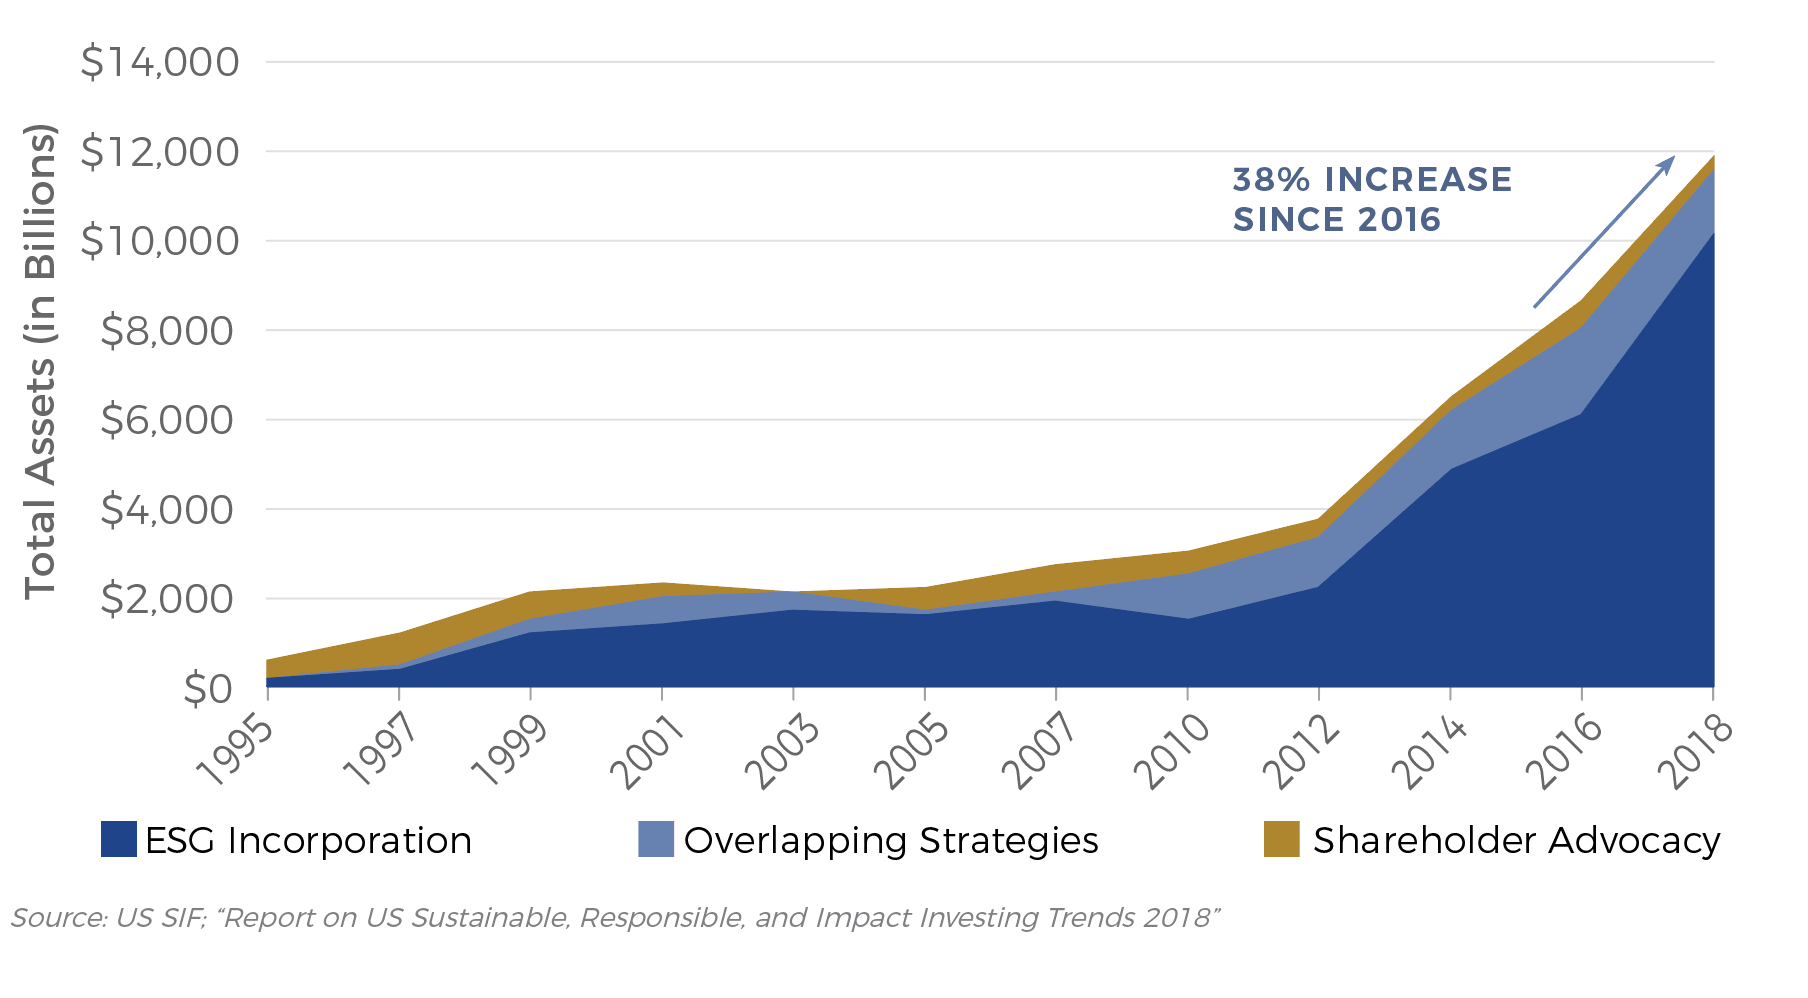